<a href="https://colab.research.google.com/github/deep-diver/LoRA-deployment/blob/main/notebooks/multiworker_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from IPython.display import Image

In [49]:
%%writefile run.py
import string
import base64
import argparse
import random
import numpy as np
import requests as r
from PIL import Image

HF_TOKEN = ""
ENDPOINT_URL = "https://yhsqcghraq9fi35s.us-east-1.aws.endpoints.huggingface.cloud"

"""
def get_random_string(length):
    letters = string.ascii_lowercase
    result_str = ''.join(random.choice(letters) for i in range(length))
    return result_str
"""

def get_concat_h(restored_reshaped):
    dst = Image.new('RGB', (512*len(restored_reshaped), 512))
    for i in range(len(restored_reshaped)):
      image = Image.fromarray(restored_reshaped[i])
      dst.paste(image, (i*512, 0))
    return dst

def send_requests(
    model_path,
    inputs, # prompt
    num_inference_steps=25,
    guidance_scale=7.5,
    num_images_per_prompt=4
):
  sd_payload = locals()

  # test the pipeline
  headers = {
    "Authorization": f"Bearer {HF_TOKEN}",
    "Content-Type": "application/json",
  }
  response = r.post(ENDPOINT_URL, headers=headers, json=sd_payload)

  decoded = base64.b64decode(response.content)
  restored = np.frombuffer(decoded, dtype="uint8")
  restored_reshaped = np.reshape(restored, (num_images_per_prompt, 512, 512, 3))
  return restored_reshaped

def parse_args():
  parser = argparse.ArgumentParser(
      description="Script to perform inference requests to HF inference endpoint."
  )
  parser.add_argument(
    "--model_path",
    default="base",
    type=str,
  )
  parser.add_argument(
    "--prompt",
    default="Green creature with menacing face",
    type=str
  )
  return parser.parse_args()

def run(args):
  restored_reshaped = send_requests(
    args.model_path,
    args.prompt
  )
  if "/" in args.model_path:
    filename = args.model_path.split("/")[1]
  else:
    filename = args.model_path
  final = get_concat_h(restored_reshaped)
  final.save(f"{filename}.jpeg")

if __name__ == "__main__":
    args = parse_args()
    run(args)

Overwriting run.py


In [ ]:
!nohup python run.py --model_path pcuenq/pokemon-lora &

In [ ]:
!nohup python run.py --model_path kuotient/noto-emoji-finetuned-lora &

In [ ]:
!nohup python run.py --model_path taesiri/ethan_ai_lora &

In [ ]:
!nohup python run.py --model_path base &

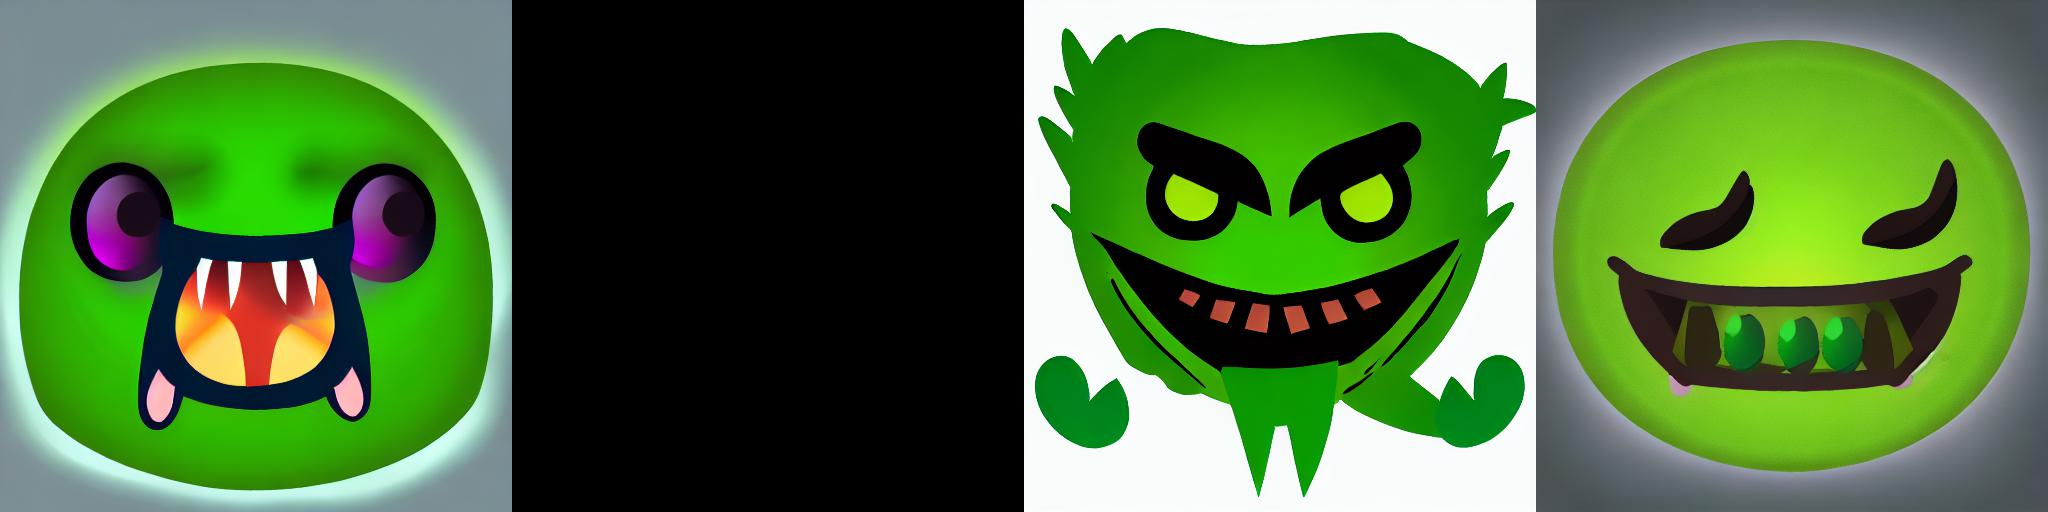

In [54]:
Image('noto-emoji-finetuned-lora.jpeg')

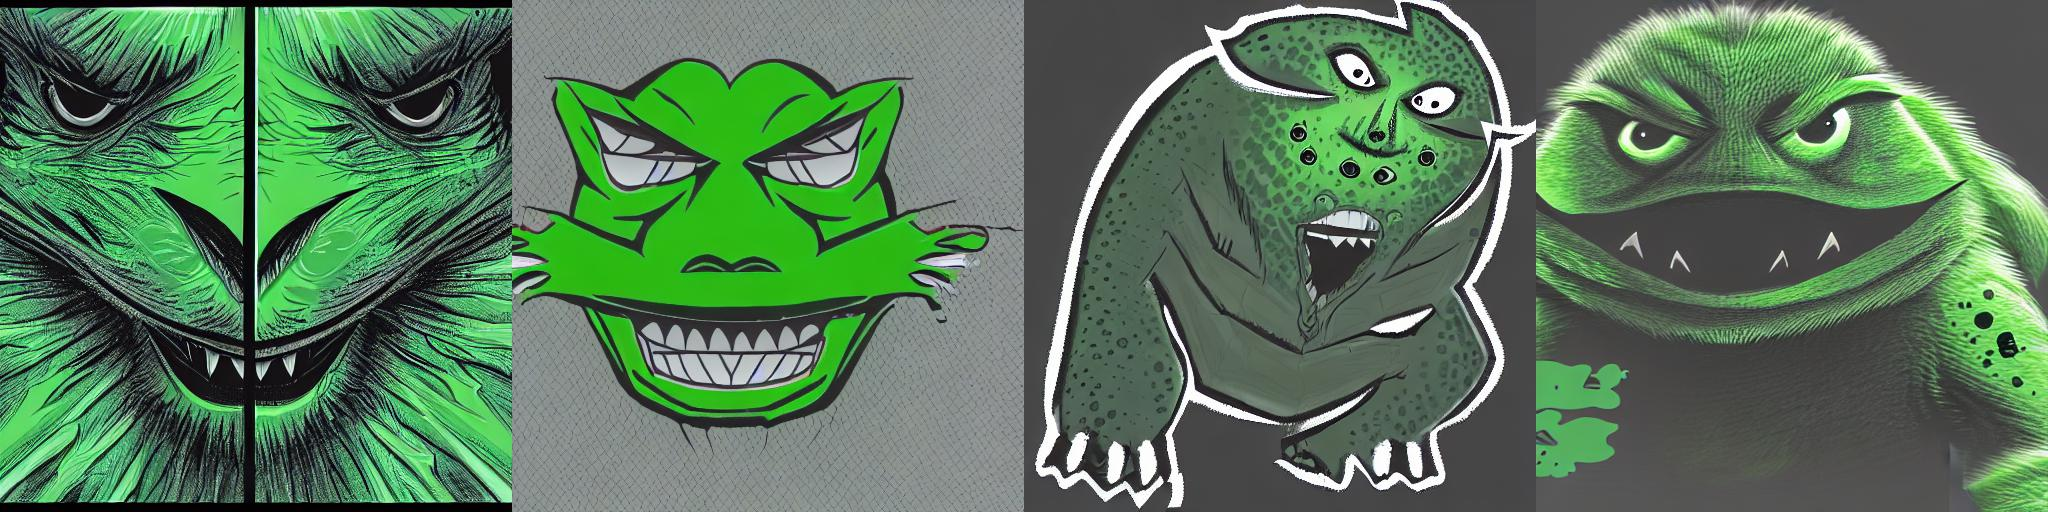

In [55]:
Image('ethan_ai_lora.jpeg')

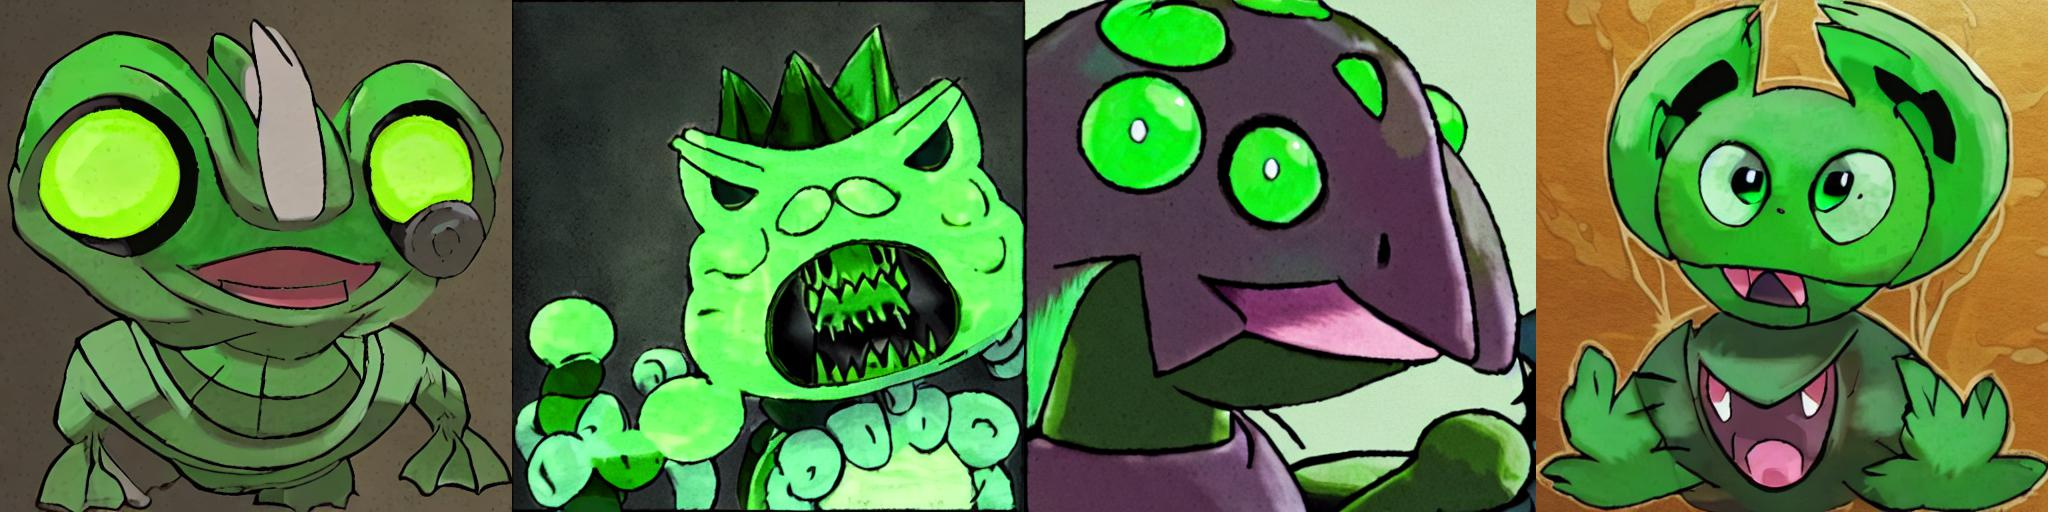

In [56]:
Image('pokemon-lora.jpeg')

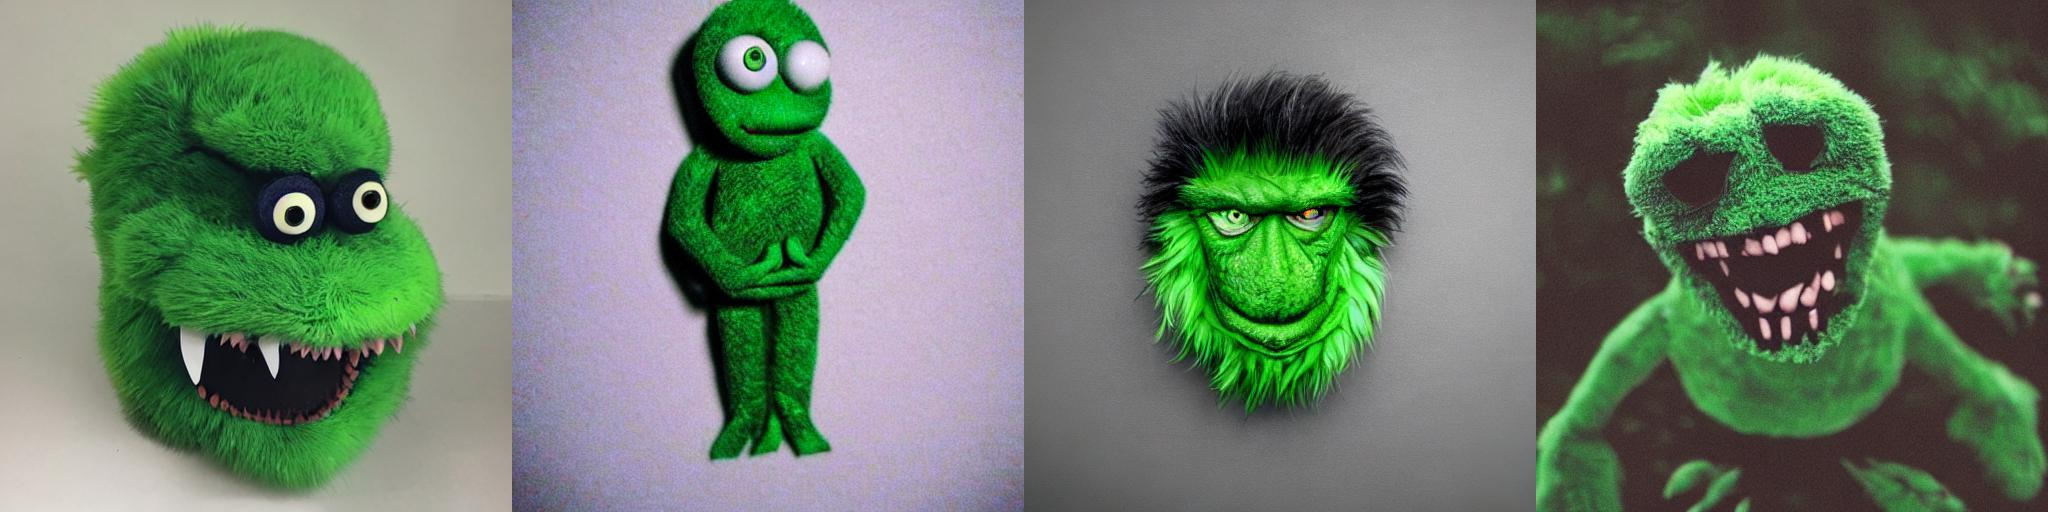

In [57]:
Image('base.jpeg')